In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [ ]:
def linear_equation(x):
    return 4 * x + 2

def linear_equation_with_noise(x):
    return 2 * x + 5 + np.random.uniform(-1, 1)

In [ ]:

x_values = np.array([1, 2, 3, 4, 5])


y_values = linear_equation(x_values)


y_values_noise = linear_equation_with_noise(x_values)

In [ ]:

X = np.vstack((np.ones_like(x_values), x_values)).T


X_transpose_X = X.T.dot(X)


X_transpose_X_inv = np.linalg.inv(X_transpose_X)


X_transpose_y_original = X.T.dot(y_values)
X_transpose_y_noise = X.T.dot(y_values_noise)

In [ ]:
w_original = X_transpose_X_inv.dot(X_transpose_y_original)
w_noise = X_transpose_X_inv.dot(X_transpose_y_noise)

In [ ]:

print("Coefficients (w)  for original equation:")
print(w_original)
print("\n (w)  with noise:")
print(w_noise)

Coefficients (w)  for original equation:
[5. 2.]

 (w)  with noise:
[4.20623233 2.        ]


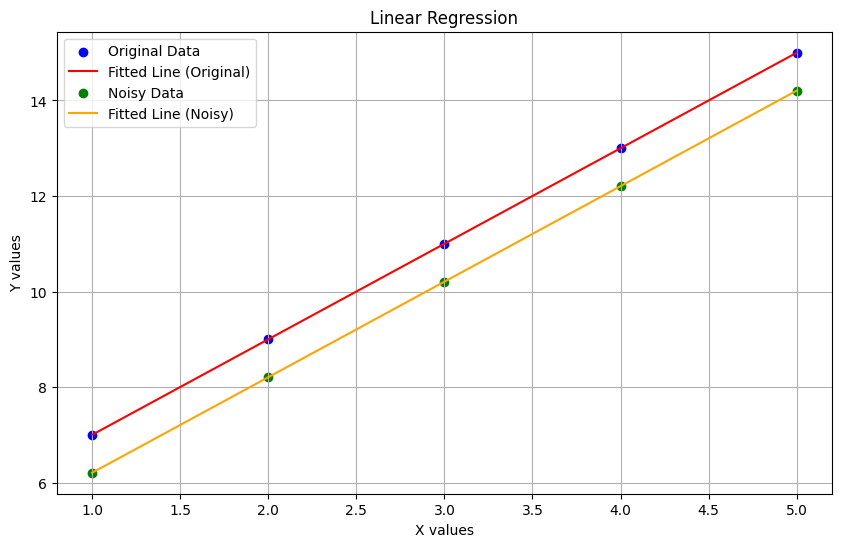

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Original Data')
plt.plot(x_values, X.dot(w_original), color='red', label='Fitted Line (Original)')
plt.scatter(x_values, y_values_noise, color='green', label='Noisy Data')
plt.plot(x_values, X.dot(w_noise), color='orange', label='Fitted Line (Noisy)')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print ("###################### part 2 ######################")

###################### part 2 ######################


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
y[(y == 2) | (y == 1)] = 1
y[y == 0] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [ ]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
predictions = np.sign(X_test.dot(w))
print("Predictions:", predictions)

Predictions: [ 1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.
  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.]


In [ ]:
def visualize_data(X, y, title):
    plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class I', marker='o')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class II', marker='x')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

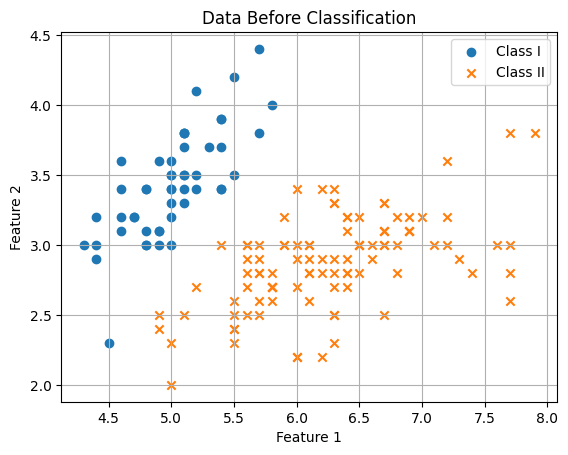

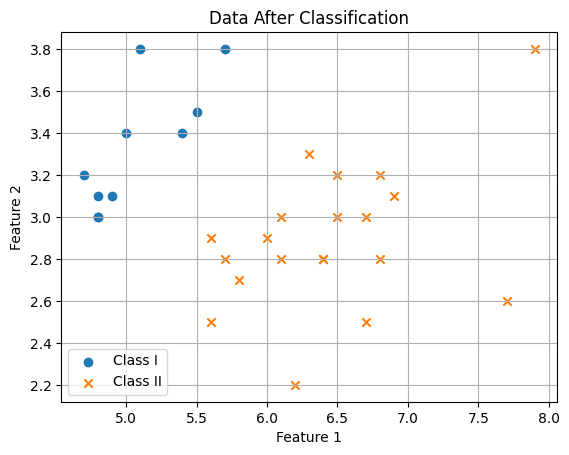

In [ ]:
visualize_data(X, y, title='Data Before Classification')

visualize_data(X_test[:, 1:], predictions, title='Data After Classification')